In [1]:
with open('/home/mdnikolaev/philurame/SDXL_METRICS/DATA/datasets.pkl' , 'rb') as f:
  import pickle
  data = pickle.load(f)

data.pop('CIFAR')
data.pop('IMAGENET');

# too big to concat
data['COCO']['anns'][5449] # 6966

/home/ekneudachina/.conda/envs/philurame_venv/lib/python3.9/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b)

['A remote control sitting on top of a table.',
 'Close up on middle section on a remote control, black with button with labels above or symbols on the buttons, which are light blue with white, or pale yellow with arrow heads, computer mouse l & r, and one orange button with LASER printed above it.',
 'A button labeled laser and four arrow buttons are shown.',
 'We are looking at a close up view of a remote control.',
 'A remote control that has a laser option.']

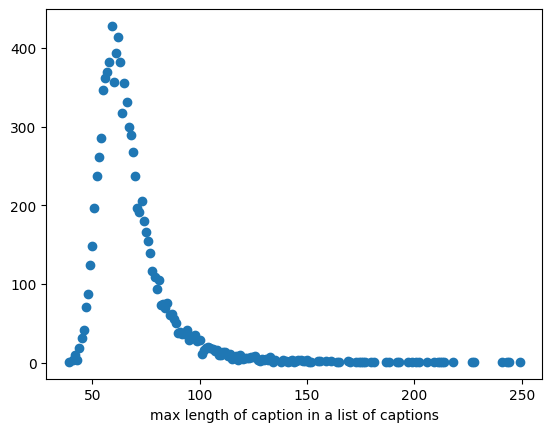

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
values_count = Counter([max([len(j) for j in i]) for i in data['COCO']['anns']])
plt.scatter(values_count.keys(), values_count.values())
plt.xlabel('max length of caption in a list of captions');

In [ ]:
import random
def process_strings(strings, max_length):
  # Sort the strings in decreasing order of length
  sorted_strings = sorted(strings, key=len, reverse=True)
  result = ''
  # Copy of the sorted strings to work with
  strings_to_check = sorted_strings.copy()
  # List to keep track of strings that are too long
  popped_strings = []

  # Step 1: Find the first suitable string
  while strings_to_check:
    first_row = strings_to_check[0]
    if len(first_row) <= max_length:
      result = first_row
      break
    else:
      # Remove strings that are too long
      popped_strings.append(strings_to_check.pop(0))
  else:
    # If all strings are too long, return truncated smallest string
    smallest_row = sorted_strings[-1]
    truncated_row = smallest_row[:max_length]
    return truncated_row

  # Step 2: Add random rows while under max_length
  random.seed(42)
  # Exclude the initial result and any popped strings
  unused_strings = [s for s in strings_to_check if s != result]

  while unused_strings:
    random_row = random.choice(unused_strings)
    potential_result = result + '\n' + random_row
    if len(potential_result) <= max_length:
      result = potential_result
      unused_strings.remove(random_row)
    else:
      break
  return result

data['COCO']['anns']  = [process_strings(i, 250) for i in data['COCO']['anns']]
data['PARTI']['anns'] = [i[:250] for i in data['PARTI']['anns']]


In [9]:
max([(len(i), n) if len(i)<250 else (0, -1) for n, i in enumerate(data['PARTI']['anns'])])

(243, 302)

In [11]:
with open('/home/mdnikolaev/philurame/SDXL_METRICS/DATA/datasets_coco_parti.pkl', 'wb') as f:
  pickle.dump(data, f)